<a href="https://colab.research.google.com/github/khatana706/DATA-SCIENCE/blob/main/model_MAP_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MOUNT DRIVE

In [ ]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Mounted at /gdrive


build TF OBJ API   --just run next four cells

In [ ]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 2955, done.
remote: Counting objects: 100% (2955/2955), done.
remote: Compressing objects: 100% (2485/2485), done.
remote: Total 2955 (delta 750), reused 1263 (delta 429), pack-reused 0
Receiving objects: 100% (2955/2955), 33.04 MiB | 24.16 MiB/s, done.
Resolving deltas: 100% (750/750), done.


In [ ]:
# Install the Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1667808 sha256=7b2e40aa4cf3661de4cf2b21386e2ae0680cd14503241cee8a5c19039ccbe59a
  Stored in directory: /tmp/pip-ephem-wheel-cache-jy04hwtm/wheels/fa/a4/d2/e9a5057e414fd46c8e543d2706cd836d64e1fcd9eccceb2329
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22258 sha256=ab18feaf7983984d0162754fc5f87c70b60c45c4b5ae09b71cecb93044ac00dd
  Stored in directory: /root/.cache/pip/wheels/d2/f1/1f/041add21dc9c4220157f1bd2bd6afe1f1a49524c3396b94401
  Created wheel for avro-python3: filename=avro_python3-1.9.2.1-py3-none-any.whl size=43512 sha256=21679355afc40d4618df5c701309cfd6313fa0bb7814bc701071f409eabe163b
  Stored in directory: /root/.cache/pip/wheels/bc/49/5f/fdb5b9d85055c478213e0158ac122b596816149a02d82e0ab1
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78546 sha256=1c0cb1de23286e2273608529a8f56df3eaee3ab4f74ec5361

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
multiprocess 0.70.12.2 requires dill>=0.3.4, but you have dill 0.3.1.1 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import matplotlib
import matplotlib.pyplot as plt

import os
import random
import io
import imageio
import glob
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Javascript
from IPython.display import Image as IPyImage

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import colab_utils
from object_detection.builders import model_builder

%matplotlib inline

In [ ]:

#run model builder test
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py

2021-10-13 15:51:13.691207: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-13 15:51:14.156847: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-13 15:51:14.157766: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-10-13 15:51:14.177290: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021

TEST MODEL and Imports

In [ ]:

import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow loggin
import imutils
tf.get_logger().setLevel('ERROR')           # Suppress TensorFlow logging (2)
import math
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
import cv2
import numpy as np
import time
from IPython.display import clear_output
from random import shuffle

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils

from object_detection.builders import model_builder

Num GPUs Available:  1


In [ ]:
#Select model folder route
#--------------INPUT FIELD----------------------------------------------------------------------------#
path_to_image_list = "/gdrive/MyDrive/darknet/outfits_topwear_tiny_model/tiny_model_valid.txt"
model_name = "centernet_output_topwear"
#----------------------------------------------------------------------------------------------------#

model = "/gdrive/MyDrive/Tensorflow_2_RnD/"
dest = model + model_name
print(dest+"/pipeline.config")
print(dest+"/checkpoint/ckpt-0")

/gdrive/MyDrive/Tensorflow_2_RnD/centernet_output_topwear/pipeline.config
/gdrive/MyDrive/Tensorflow_2_RnD/centernet_output_topwear/checkpoint/ckpt-0


In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(dest+"/pipeline.config")
model_config = configs['model']
detection_model = model_builder.build(model_config=model_config, is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(dest+"/checkpoint/ckpt-0")).expect_partial()

    
detect_fn = tf.saved_model.load(dest+"/saved_model")
category_index = label_map_util.create_category_index_from_labelmap(dest+"/labelmap.pbtxt"
                                                                    ,use_display_name=True)

GRAPHICAL SANITY CHECK

In [ ]:
/gdrive/MyDrive/Tensorflow_2_RnD/centernet_output_topwear[work_needed]/checkpoint/ckpt-0

labels= []
for i in range(1,len(category_index)+1):
      labels.append(category_index[i]['name']) 
labels

['blazer',
 'bodysuit',
 'brassiere',
 'cardigan',
 'coats',
 'dress',
 'jackets',
 'jumpsuit',
 'kaftan',
 'poncho',
 'shirt',
 'sweatshirts',
 'tops']

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings
from tqdm import tqdm
f=open(path_to_image_list,"r")
paths=f.read()
f.close()
paths=paths.split('\n')
shuffle(paths)
for i in paths:
    if len(i)==0:
        paths.remove(i)
count =0
wrong =0
na = ['NA']
def load_image_into_numpy_array(path):
    #print(np.array(Image.open(path)))
    """plt.figure()
    plt.imshow(Image.open(path))
    plt.show"""
    
    return np.array(Image.open(path))
def common_member(a, b):
    a_set = set(a)
    b_set = set(b)
 
    if (a_set & b_set):
        return list(a_set & b_set)
    else:
        return na

  0%|          | 0/10 [00:00<?, ?it/s]


tops


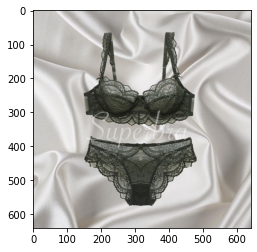

 10%|█         | 1/10 [00:51<07:47, 51.97s/it]


tops


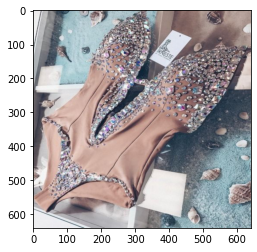

 20%|██        | 2/10 [01:06<03:59, 29.97s/it]


shirt


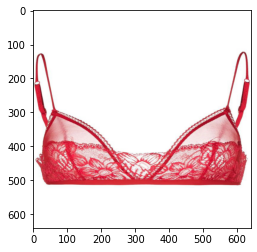

 30%|███       | 3/10 [01:21<02:43, 23.30s/it]


sweatshirts


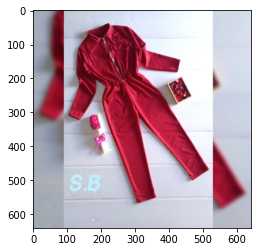

 40%|████      | 4/10 [01:43<02:16, 22.75s/it]


sweatshirts


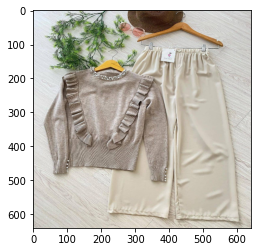

 50%|█████     | 5/10 [02:21<02:21, 28.28s/it]


KeyboardInterrupt: ignored

In [ ]:

for image_path in tqdm(paths[:10]):
    if os.path.isfile(image_path)==False:
        print("file doesnt exists")
        continue
    #print('Running inference for {}... '.format(image_path), end='')
    image_np = load_image_into_numpy_array(image_path)
    image_np=cv2.resize(image_np,(640,640))
    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    #input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=100,
          min_score_thresh=1,
          agnostic_mode=False)
    checks = common_member(labels,image_path.split('/'))
    print(checks[0])
    #print('\n'+category_index[detections['detection_classes'][0]]['name'])
    #print(image_path.split('\\')[4])
    
    #print(detections['detection_classes'][0])
    #print(category_index[detections['detection_classes'][0]]['name'])
    #print(detections['detection_scores'][0])
    plt.figure()
    plt.imshow(image_np_with_detections)
    #print('Done')
    plt.show()

%matplotlib inline

FULL CHECK

In [ ]:
undet =0
for image_path in tqdm(paths):
    if os.path.isfile(image_path)==False:
        undet+=1
        print("file doesnt exists")
        continue
    #print('Running inference for {}... '.format(image_path), end='')
    checks = common_member(labels,image_path.split('/'))
    #print('Running inference for {}... '.format(image_path), end='')

    image_np = load_image_into_numpy_array(image_path)
    image_np=cv2.resize(image_np,(640,640))
    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    #input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=100,
          min_score_thresh=.3,
          agnostic_mode=False)
    #print(category_index[detections['detection_classes'][0]]['name'])
    #print(checks[0])
    try:
        if(category_index[detections['detection_classes'][0]]['name']==checks[0]):
            count+=1
        elif(category_index[detections['detection_classes'][1]]['name']==checks[0]):
            count+=1
        elif(category_index[detections['detection_classes'][2]]['name']==checks[0]):
            count+=1
        elif(category_index[detections['detection_classes'][3]]['name']==checks[0]):
            count+=1
        else:
            wrong+=1
    except:
        print('fault found')
    
print("MEAN AVERAGE PRECISION=="+count/(len(paths)-undet))


  0%|          | 9/2115 [00:26<3:02:06,  5.19s/it]

file doesnt exists


  1%|          | 17/2115 [01:52<9:34:44, 16.44s/it]

file doesnt exists


  1%|          | 19/2115 [02:01<6:22:36, 10.95s/it]

file doesnt exists
file doesnt exists


  1%|▏         | 28/2115 [03:06<5:19:44,  9.19s/it]

file doesnt exists


  2%|▏         | 47/2115 [04:41<5:34:53,  9.72s/it]

file doesnt exists


  2%|▏         | 49/2115 [04:42<3:09:46,  5.51s/it]

file doesnt exists


  2%|▏         | 52/2115 [04:44<1:44:33,  3.04s/it]

file doesnt exists
file doesnt exists


  3%|▎         | 62/2115 [05:22<3:56:51,  6.92s/it]

file doesnt exists
file doesnt exists


  3%|▎         | 65/2115 [05:23<1:53:47,  3.33s/it]

file doesnt exists


  3%|▎         | 70/2115 [05:39<1:29:25,  2.62s/it]

file doesnt exists
file doesnt exists
